In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
def perspective2(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    img2 = image.copy()
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
        img2 = cv2.drawContours(img2, [box], -1, (0, 0, 255), 5)
        
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp

    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight), borderValue = (255,255,255)) # warp에 이미지 담김
    
    # plt imshow로 그림그려줌
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(warp,cmap='gray')
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

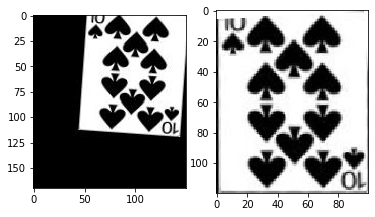

In [16]:
warp_img, rect = perspective2('../big_au/sample2/S10_0_5313.jpg')

In [7]:
?cv2.warpPerspective